In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/heart.csv')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [ ]:
df.drop('RestingECG', axis=1, inplace=True)

In [ ]:
df.drop('Oldpeak', axis=1, inplace=True)
df.drop('ST_Slope', axis=1, inplace=True)

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140,289,0,172,N,0
1,49,F,NAP,160,180,0,156,N,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   MaxHR           918 non-null    int64 
 7   ExerciseAngina  918 non-null    object
 8   HeartDisease    918 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 64.7+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
ExerciseAngina,0
HeartDisease,0


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
ExerciseAngina,object
HeartDisease,int64


In [ ]:
df.drop('ChestPainType', axis=1, inplace=True)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [ ]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, 'Other': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [ ]:
df.head(-1)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease
0,40,1,140,289,0,172,0,0
1,49,0,160,180,0,156,0,1
2,37,1,130,283,0,98,0,0
3,48,0,138,214,0,108,1,1
4,54,1,150,195,0,122,0,0
...,...,...,...,...,...,...,...,...
912,57,0,140,241,0,123,1,1
913,45,1,110,264,0,132,0,1
914,68,1,144,193,1,141,0,1
915,57,1,130,131,0,115,1,1


<Axes: xlabel='HeartDisease', ylabel='count'>

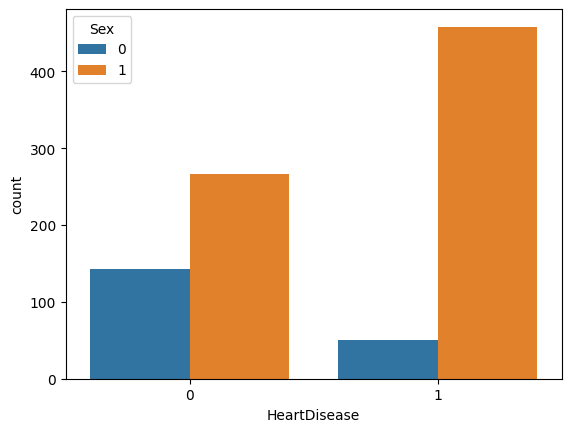

In [ ]:
sns.countplot(df, x='HeartDisease', hue='Sex')

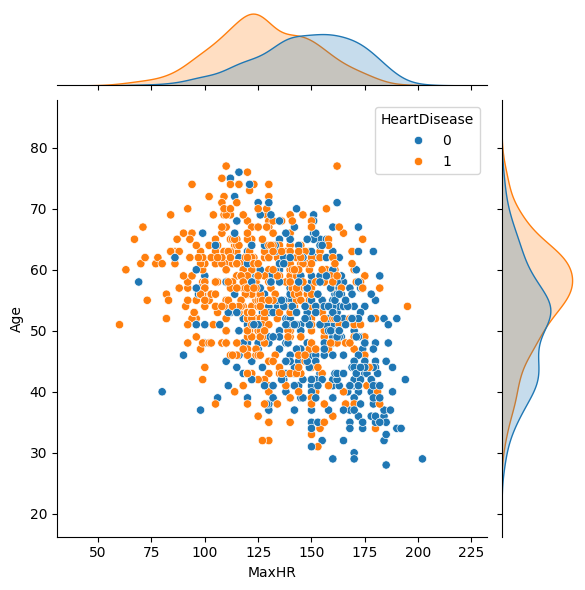

In [ ]:
sns.jointplot(df, y='Age', x='MaxHR',  hue='HeartDisease')

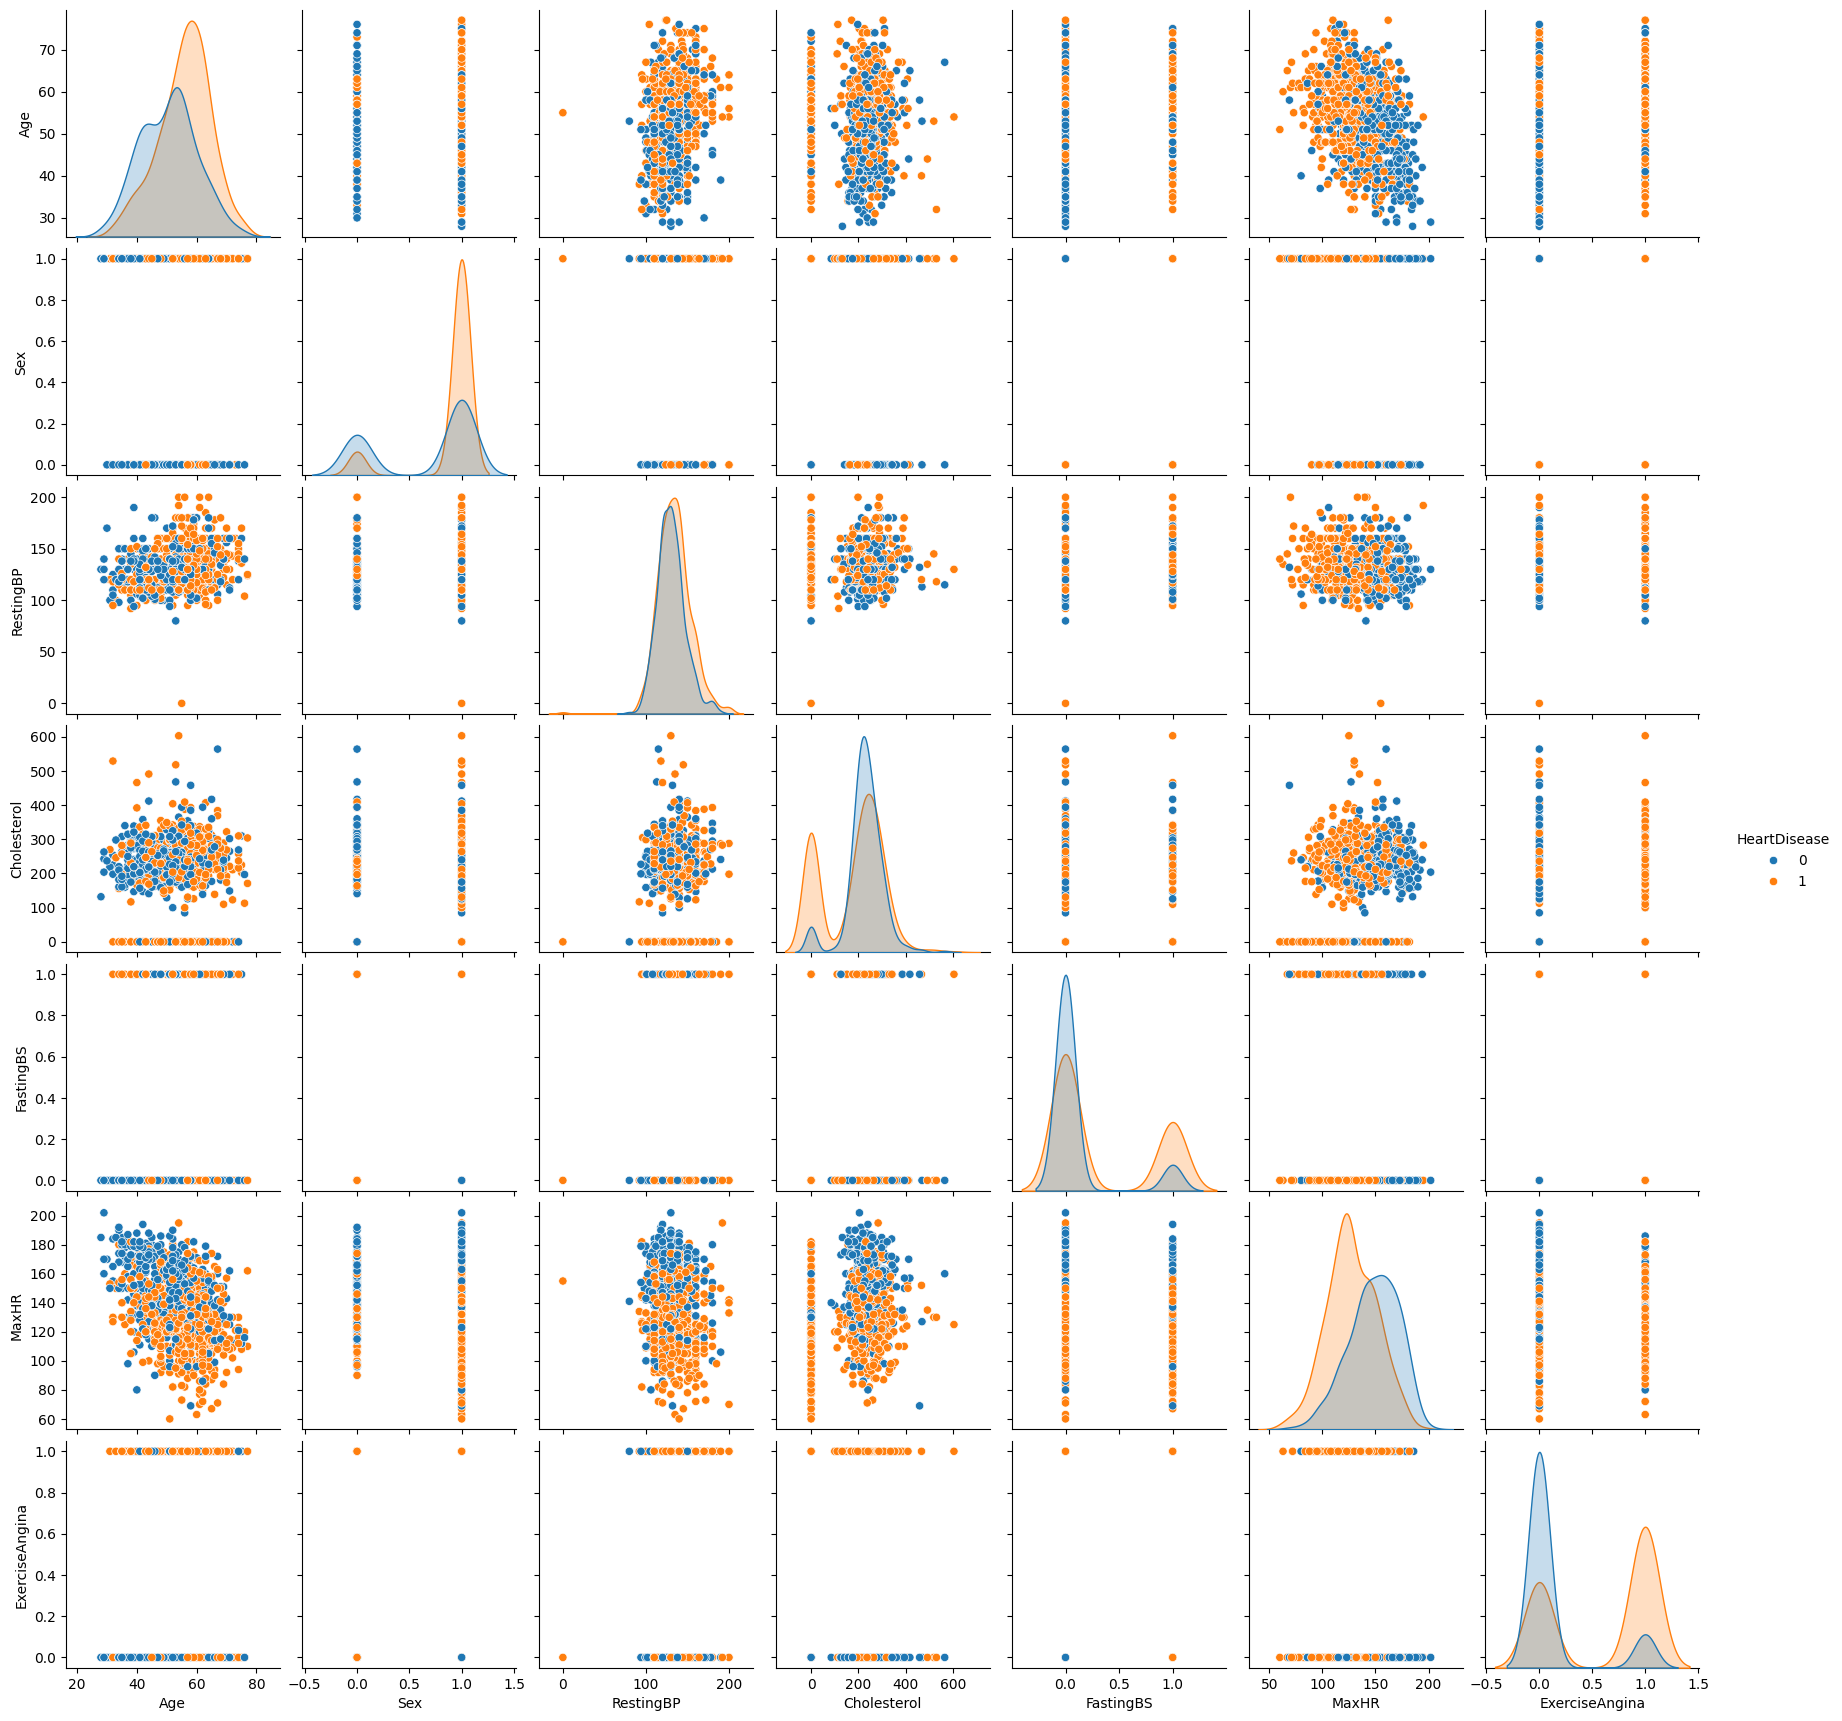

In [ ]:
sns.pairplot(df, hue='HeartDisease')

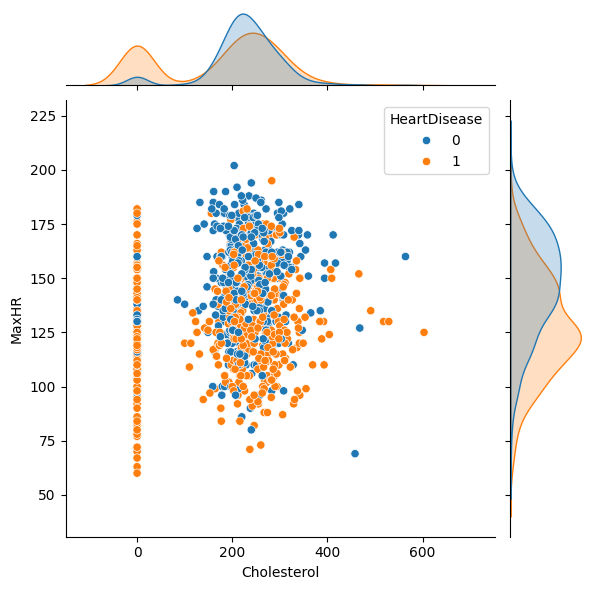

In [ ]:
sns.jointplot(df, x='Cholesterol', y='MaxHR', hue='HeartDisease')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
X= df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
y_test

,HeartDisease
668,0
30,1
377,1
535,1
807,0
...,...
259,0
490,1
302,1
7,0


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7956521739130434


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        98
           1       0.84      0.80      0.82       132

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.80      0.80      0.80       230



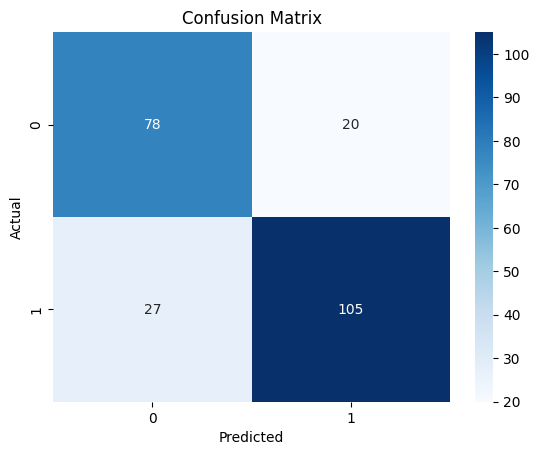

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC curve

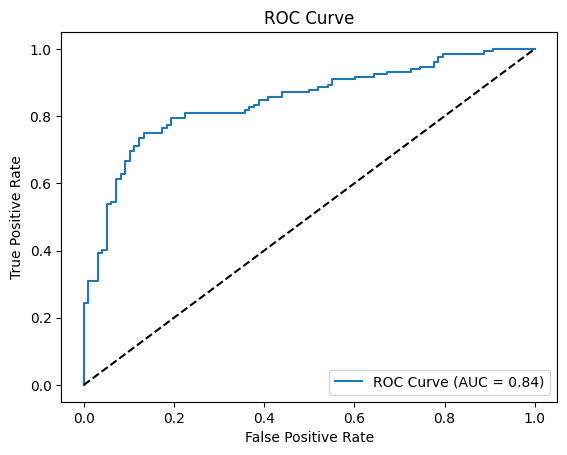

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

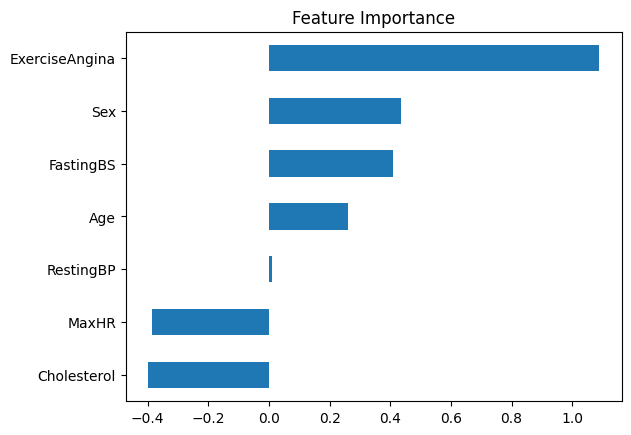

In [ ]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()